In [39]:
#%matplotlib inline

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
routes = pd.read_csv("routes.txt", usecols=[0, 3, 7, 8])
routes.head()

,route_id,route_long_name,route_color,route_text_color
0,GOLD ALT,Gold 1 Alternate,c7994a,000000
1,RUBY SATURDAY,Ruby Saturday,eb008b,000000
2,SILVER LIMITED SATURDAY,Silver Limited Saturday,d1d3d4,000000
3,BROWN ALT PM,Brown Alternate PM,823822,ffffff
4,YELLOW LATE NIGHT SUNDAY,Yellow Late Night Sunday,fcee1f,000000


In [42]:
routes["route_id"]

0                             GOLD ALT
1                        RUBY SATURDAY
2              SILVER LIMITED SATURDAY
3                         BROWN ALT PM
4             YELLOW LATE NIGHT SUNDAY
5               GREEN EVENING SATURDAY
6                             GREY ALT
7               TEAL LATE NIGHT SUNDAY
8            GREEN LATE NIGHT SATURDAY
9               5E GREEN EXPRESS 1 ALT
10                      GREEN SATURDAY
11                     3S LAVENDER ALT
12               SILVER LIMITED SUNDAY
13               SILVER EVENING SUNDAY
14               LIME EVENING SATURDAY
15               ILLINI EVENING SUNDAY
16        GREENHOPPER EVENING SATURDAY
17                       YELLOW SUNDAY
18                       TEAL SATURDAY
19                        LAVENDER ALT
20                              YELLOW
21                                 RED
22                5E GREEN EXPRESS ALT
23                       SILVER SUNDAY
24                         GREENHOPPER
25                       

Let's see how many routes there are in total.

In [43]:
routes["route_id"].count()

101

In [44]:
routes["route_id"].nunique()

101

In [45]:
calendar_dates = pd.read_csv("calendar_dates.txt")
calendar_dates['date'] = pd.to_datetime(pd.Series(calendar_dates['date']), format="%Y%m%d")
calendar_dates.tail()

,service_id,date,exception_type
12260,I1-4 UIMTH,2017-05-04,1
12261,I1-4 UIMTH,2017-05-08,1
12262,I1-4 UIMTH,2017-05-09,1
12263,I1-4 UIMTH,2017-05-10,1
12264,I1-4 UIMTH,2017-05-11,1


In [46]:
calendar_dates[calendar_dates["exception_type"] == 2]

,service_id,date,exception_type


I wanted to use calendar and calendar_dates file to get information about dates that specific services run or don't run, but the columns for days of the week are zeros.

In [47]:
trips = pd.read_csv("trips.txt")
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13


Let's get a breakdown of the number of services for each route.

In [48]:
trip_groups = trips.groupby('route_id').count()
trip_groups = trip_groups.reset_index()
trip_groups = trip_groups[['route_id','service_id']]
trip_groups.rename(columns={'service_id': 'count'}, inplace=True)

Let's get routes with the highest number of services.

In [49]:
trip_groups = trip_groups.sort_values(by='count', ascending=False)

In [50]:
trip_groups

,route_id,count
72,SILVER,333
42,ILLINI,250
83,TEAL,238
43,ILLINI EVENING,224
89,TEAL SATURDAY,222
99,YELLOWHOPPER,141
49,ILLINI LIMITED SATURDAY,138
44,ILLINI EVENING SATURDAY,135
31,GREEN SATURDAY,129
97,YELLOW SATURDAY,127


In [51]:
stop_times = pd.read_csv("stop_times.txt")
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type
0,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:25:00,07:25:00,DEPOT:1,0,WEST - ILLINOIS TERMINAL,0,0
1,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,2,WEST - ILLINOIS TERMINAL,0,0
2,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,0,WEST - ILLINOIS TERMINAL,0,0
3,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:36:35,07:36:35,PAMD:2,1,NaN,0,0
4,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:37:48,07:37:48,PSL:2,2,NaN,0,0


Let's see which trips have some waiting time.

In [52]:
df = stop_times[stop_times["arrival_time"] != stop_times["departure_time"]]
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type
728,20RED001__R1SA,07:30:00,07:32:00,MKTPLC:1,29,NaN,0,0
748,20RED002__R1SA,07:48:00,07:55:00,MKTPLC:1,8,NaN,0,0
868,20RED003__R1SA,09:00:00,09:02:00,MKTPLC:1,61,NaN,0,0
888,20RED004__R1SA,09:18:00,09:25:00,MKTPLC:1,8,NaN,0,0
1008,20RED005__R1SA,10:30:00,10:32:00,MKTPLC:1,61,NaN,0,0
1028,20RED006__R1SA,10:48:00,10:55:00,MKTPLC:1,8,NaN,0,0
1148,20RED007__R1SA,12:00:00,12:02:00,MKTPLC:1,61,NaN,0,0
1168,20RED008__R1SA,12:18:00,12:25:00,MKTPLC:1,8,NaN,0,0
1288,20RED009__R1SA,13:30:00,13:32:00,MKTPLC:1,61,NaN,0,0
1308,20RED010__R1SA,13:48:00,13:55:00,MKTPLC:1,8,NaN,0,0


In [53]:
df.dtypes

trip_id           object
arrival_time      object
departure_time    object
stop_id           object
stop_sequence      int64
stop_headsign     object
pickup_type        int64
drop_off_type      int64
dtype: object

In [54]:
df["arrival_time_in_mins"] = pd.to_datetime(df["arrival_time"], format='%H:%M:%S').dt.hour.mul(60) + pd.to_datetime(df["arrival_time"], format='%H:%M:%S').dt.minute
df["departure_time_in_mins"] = pd.to_datetime(df["departure_time"], format='%H:%M:%S').dt.hour.mul(60) + pd.to_datetime(df["departure_time"], format='%H:%M:%S').dt.minute
df["waiting_time_in_mins"] = df["departure_time_in_mins"] - df["arrival_time_in_mins"]
df

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_time_in_mins,departure_time_in_mins,waiting_time_in_mins
728,20RED001__R1SA,07:30:00,07:32:00,MKTPLC:1,29,NaN,0,0,450,452,2
748,20RED002__R1SA,07:48:00,07:55:00,MKTPLC:1,8,NaN,0,0,468,475,7
868,20RED003__R1SA,09:00:00,09:02:00,MKTPLC:1,61,NaN,0,0,540,542,2
888,20RED004__R1SA,09:18:00,09:25:00,MKTPLC:1,8,NaN,0,0,558,565,7
1008,20RED005__R1SA,10:30:00,10:32:00,MKTPLC:1,61,NaN,0,0,630,632,2
1028,20RED006__R1SA,10:48:00,10:55:00,MKTPLC:1,8,NaN,0,0,648,655,7
1148,20RED007__R1SA,12:00:00,12:02:00,MKTPLC:1,61,NaN,0,0,720,722,2
1168,20RED008__R1SA,12:18:00,12:25:00,MKTPLC:1,8,NaN,0,0,738,745,7
1288,20RED009__R1SA,13:30:00,13:32:00,MKTPLC:1,61,NaN,0,0,810,812,2
1308,20RED010__R1SA,13:48:00,13:55:00,MKTPLC:1,8,NaN,0,0,828,835,7


Now we get the average waiting time overall.

In [55]:
df["waiting_time_in_mins"].mean()

4.0451713395638631

Let's plot stops versus the wait times.

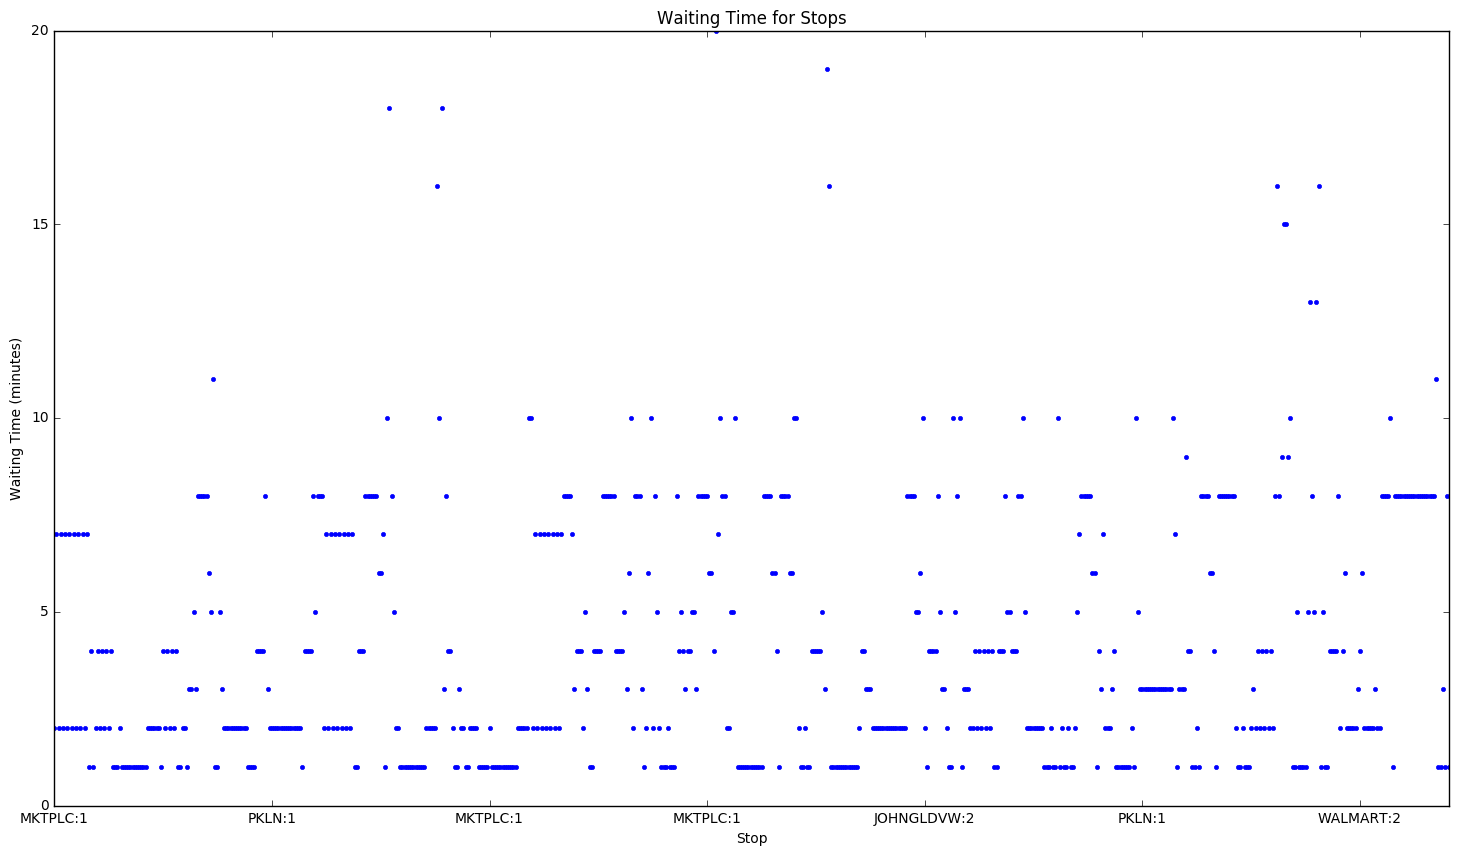

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (18, 10))
ax = df.plot(x = "stop_id", y = "waiting_time_in_mins", style = '.', title = "Waiting Time for Stops", ax = plt.gca(), legend = False)
ax.set_xlabel("Stop")
ax.set_ylabel("Waiting Time (minutes)")

Let's see where the longest waits are.

In [57]:
stops = pd.read_csv("stops.txt")
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,KBYWSFLD:3,MTD4346,Kirby & Westfield (South Side),NaN,40.098248,-88.290173,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
1,PHILOMI:4,MTD1026,Philo & Michigan (NW Corner),NaN,40.101792,-88.190865,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
2,DNCNCLKRD:2,MTD3333,Duncan & Clark (SE Corner),NaN,40.117390,-88.295470,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
3,TRLSPHILO:1,MTD6424,Trails & Philo (NE Corner),NaN,40.077915,-88.190315,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
4,RMNERKA:4,MTD4040,Romine & Eureka (NW Corner),NaN,40.125585,-88.227525,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN


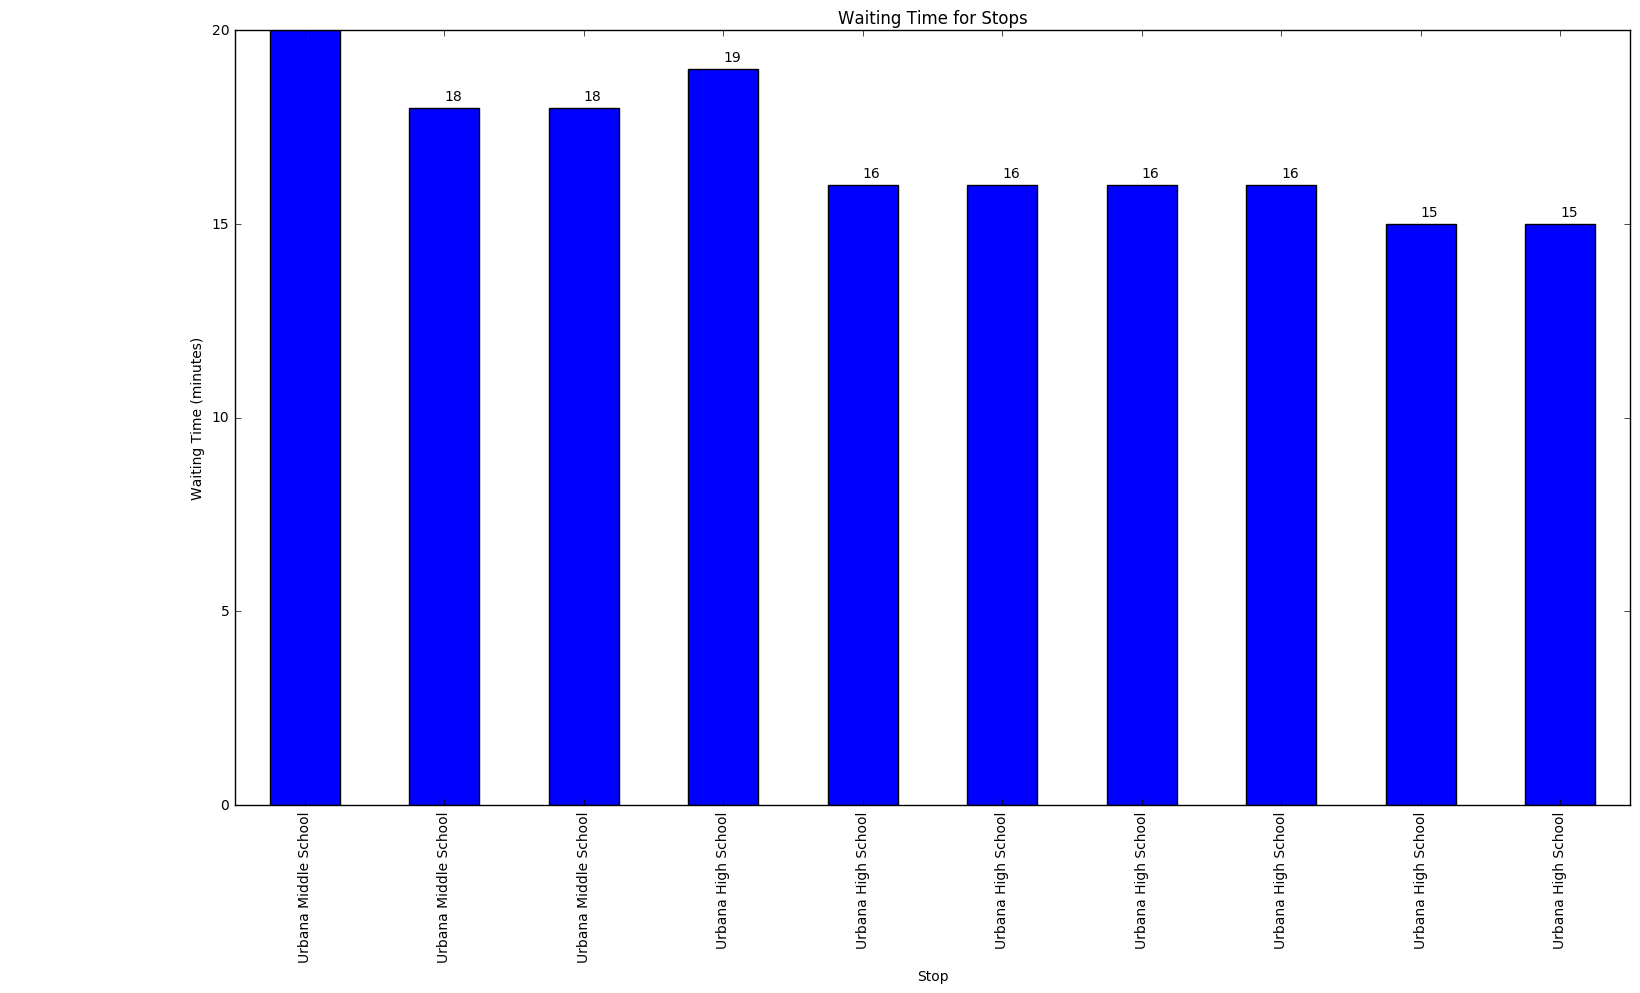

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (18, 10))

df333 = df.drop_duplicates(subset = "stop_id")


df333 = df.sort_values(by='waiting_time_in_mins', ascending=False)
df333 = df333.head(10)

df333 = pd.merge(df333, stops, on="stop_id")

#ax = df333.plot(x = "stop_id", y = "waiting_time_in_mins", style = 'o', title = "Waiting Time for Stops", ax = plt.gca(), legend = False)
ax = df333.plot(x = "stop_name", y = "waiting_time_in_mins", kind="bar", style = 'o', title = "Waiting Time for Stops", ax = plt.gca(), legend = False)


for i, label in enumerate(list(df333.index)):
    wait = df333.ix[label]['waiting_time_in_mins']
    ax.annotate(str(wait), (i, wait + 0.2))

ax.set_xlabel("Stop")
ax.set_ylabel("Waiting Time (minutes)")

So the longest waits are at Urbana Middle School and Urbana High School stops. I think it makes sense.

In [59]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13


Let's see how many buses are operating accross Champaign-Urbana.

In [60]:
trips["block_id"].unique().size

288

In [61]:
t = trips.groupby('block_id').count()
t.reset_index()

,block_id,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,10W UHS UMS,2,2,2,2,2,2
1,1N SHOW,2,2,2,2,2,2
2,1N SHOW WED,3,3,3,3,3,3
3,1S SHOW,2,2,2,2,2,2
4,1S SHOW WED,2,2,2,2,2,2
5,3N SHOW WED,1,1,1,1,1,1
6,3N SHOW#1,2,2,2,2,2,2
7,3N#3 SHOW,2,2,2,2,2,2
8,3N#3 SHOW WED,2,2,2,2,2,2
9,3S / 5W SHOW,3,3,3,3,3,3


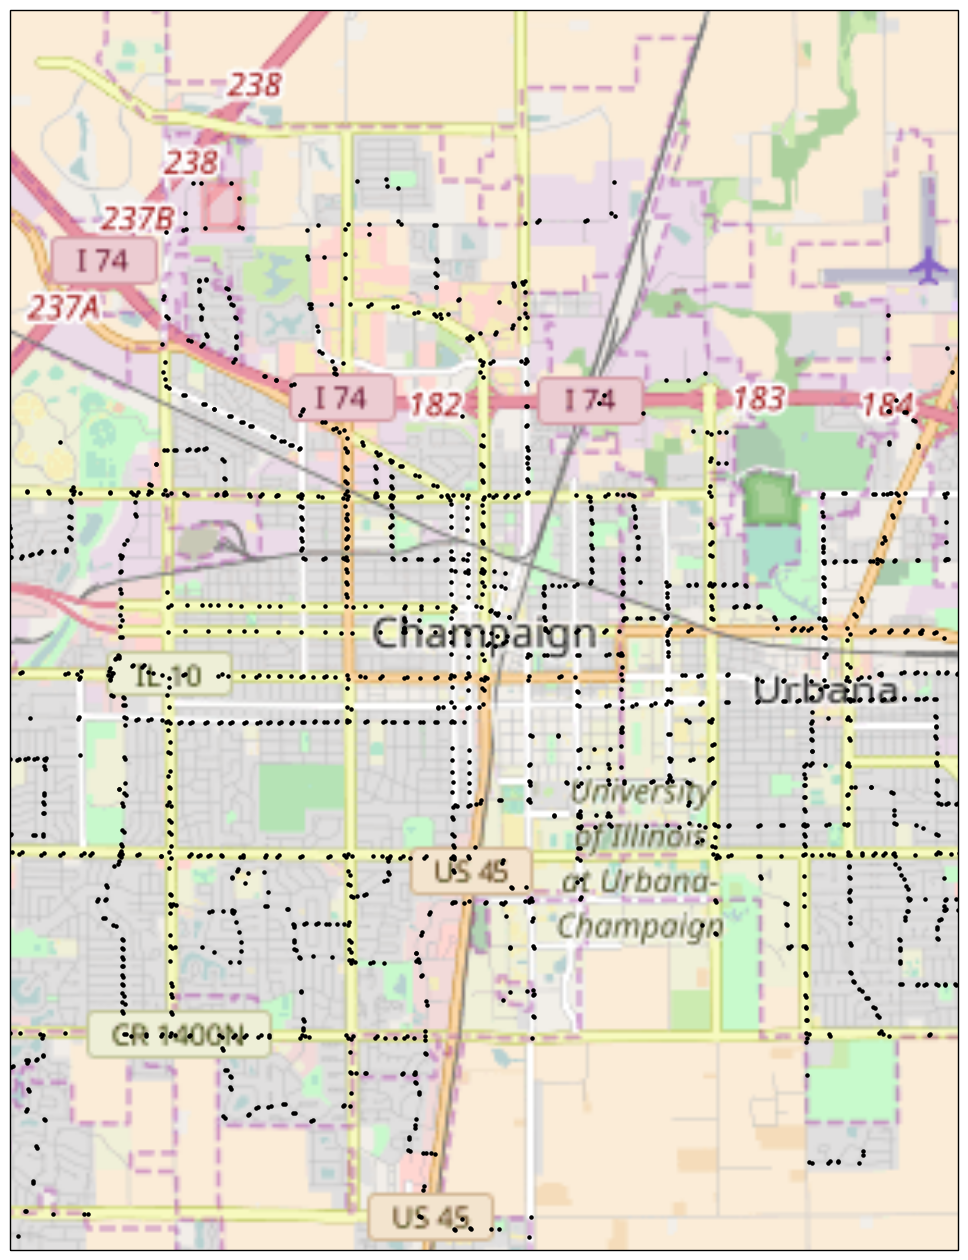

In [62]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import matplotlib.pyplot as plt


lat, lon = 40.1164, -88.2434
dlat = 0.05
dlon = 0.05

osm_tiles = OSM()

plt.figure(figsize=(16, 16))

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=osm_tiles.crs)

# Specify a region of interest, in this case, Cardiff.
ax.set_extent([lon - dlon, lon + dlon, lat - dlat, lat + dlat], ccrs.PlateCarree())
# fargeshoono nemidoonam
#ax.set_extent([lon - dlon, lon + dlon, lat - dlat, lat + dlat])

# Add the tiles at zoom level 12.
ax.add_image(osm_tiles, 12)

ax.coastlines('10m')

df22 = stops.head()

stop_lat = stops["stop_lat"]
stop_lon = stops["stop_lon"]
#ax.plot(stop_lon, stop_lat, marker = 'o', transform = ccrs.PlateCarree())
ax.scatter(stop_lon, stop_lat, marker = '.', color = 'black', transform = ccrs.PlateCarree())


plt.show()



#plt.show()

Next, let's see how many iStops there are.

In [63]:
fare_rules = pd.read_csv("fare_rules.txt")
fare_rules.head()

,fare_id,route_id,origin_id,destination_id,contains_id
0,NORMAL,NaN,1,NaN,NaN
1,ISTOP,GOLD ALT,2,NaN,NaN
2,NORMAL,RUBY SATURDAY,2,NaN,NaN
3,ISTOP,SILVER LIMITED SATURDAY,2,NaN,NaN
4,NORMAL,BROWN ALT PM,2,NaN,NaN


In [64]:
fare_rules[fare_rules['fare_id'] == 'NORMAL'].count()

fare_id           57
route_id          56
origin_id         57
destination_id     0
contains_id        0
dtype: int64

In [65]:
fare_rules[fare_rules['fare_id'] == 'ISTOP'].count()

fare_id           45
route_id          45
origin_id         45
destination_id     0
contains_id        0
dtype: int64

So, at 45 stops you can get on for free, and for 57 stops you do have to pay the fare.

In [66]:
routes.head()

,route_id,route_long_name,route_color,route_text_color
0,GOLD ALT,Gold 1 Alternate,c7994a,000000
1,RUBY SATURDAY,Ruby Saturday,eb008b,000000
2,SILVER LIMITED SATURDAY,Silver Limited Saturday,d1d3d4,000000
3,BROWN ALT PM,Brown Alternate PM,823822,ffffff
4,YELLOW LATE NIGHT SUNDAY,Yellow Late Night Sunday,fcee1f,000000


In [67]:
shapes = pd.read_csv("shapes.txt")
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,[@2.0.86175868@]34,40.114158,-88.173105,0,0.000000
1,[@2.0.86175868@]34,40.114158,-88.173106,1,0.134184
2,[@2.0.86175868@]34,40.114171,-88.173107,2,1.560577
3,[@2.0.86175868@]34,40.114186,-88.173108,3,3.228456
4,[@2.0.86175868@]34,40.114200,-88.173109,4,4.787531
